In [119]:
#Load Required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score, precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, precision_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
from itertools import cycle
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score

## Gradient Boosting

In [106]:
dataGB = pd.read_csv('movieDataClean.csv')

#Gradient Boosting with one-hot code

XGB = dataGB.drop(columns=['Risk_Level_medium', 'Risk_Level_low'])
yGB = dataGB[['Risk_Level_medium', 'Risk_Level_low']].idxmax(axis=1)

X_trainGB, X_testGB, y_trainGB, y_testGB = train_test_split(X, y, test_size=0.2, random_state=42)


gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

## SVM

In [107]:
#Load data
dataSVM = pd.read_csv('movieDataClean.csv')

# Reverting one-hot encoded columns to a single categorical column
# The idxmax method finds the column with the maximum value for each row, which corresponds to the original category
dataSVM['Risk_Level'] = dataSVM[['Risk_Level_high', 'Risk_Level_medium', 'Risk_Level_low']].idxmax(axis=1)

# To make it look like the original categories, you can remove the prefix 'Risk_Level_'
dataSVM['Risk_Level'] = dataSVM['Risk_Level'].str.replace('Risk_Level_', '')

# Now you can drop the one-hot encoded columns
dataSVM = dataSVM.drop(columns=['Risk_Level_high', 'Risk_Level_medium', 'Risk_Level_low'])

# Split data into features and target
XSVM = dataSVM.drop(columns=['Risk_Level'])
ySVM = dataSVM['Risk_Level']

# Split into training and testing sets
X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
clf = svm.SVC(gamma='scale', C=1, probability=True)
clf.fit(X_train, y_train)  

# Predict on the test set
y_pred = clf.predict(X_test)  

## Logistic Regression

In [108]:
#Load data
dataLR = pd.read_csv("movieDataClean.csv")

#Create conditions for the new categorical target column (risk levels combined into one column)
conditions = [
    (dataLR['Risk_Level_high'] == 1),
    (dataLR['Risk_Level_low'] == 1),
    (dataLR['Risk_Level_medium'] == 1)
]
choices = ['High', 'Low', 'Medium']
dataLR['Risk_Level'] = pd.Series(pd.Categorical(np.select(conditions, choices, default='unknown')))

#Drop the original one-hot encoded columns
dataLR.drop(['Risk_Level_high', 'Risk_Level_low', 'Risk_Level_medium'], axis=1, inplace=True)

#Separate the features and target variable
XLR = dataLR.drop('Risk_Level', axis=1)
yLR = dataLR['Risk_Level']

#Split the dataset into training and testing sets
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and fit the logistic regression model
LRmodel = OneVsRestClassifier(LogisticRegression(max_iter=1000))
LRmodel.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

## Neural Network

In [109]:
#Load data
dataGSM = pd.read_csv('movieDataClean.csv')

#Separate Predictors from Target Variables
XGSM = dataGSM.drop(columns=['Risk_Level_high', 'Risk_Level_low', 'Risk_Level_medium'])

#Separate Target Variables
yGSM = dataGSM[['Risk_Level_high', 'Risk_Level_low', 'Risk_Level_medium']]

#Split data into training and testing sets
X_trainGSM, X_testGSM, y_trainGSM, y_testGSM = train_test_split(XGSM, yGSM, test_size=0.2, random_state=42)

#Model configuration and training
modelGSM = MLPClassifier(
    hidden_layer_sizes=(50, 30),  
    activation='relu',             
    solver='adam',                 
    random_state=50,               
    max_iter=500,                  
    learning_rate_init=0.001       
)
modelGSM.fit(X_train, y_train)  

  

MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=50)

## ROC Graph for all Classes

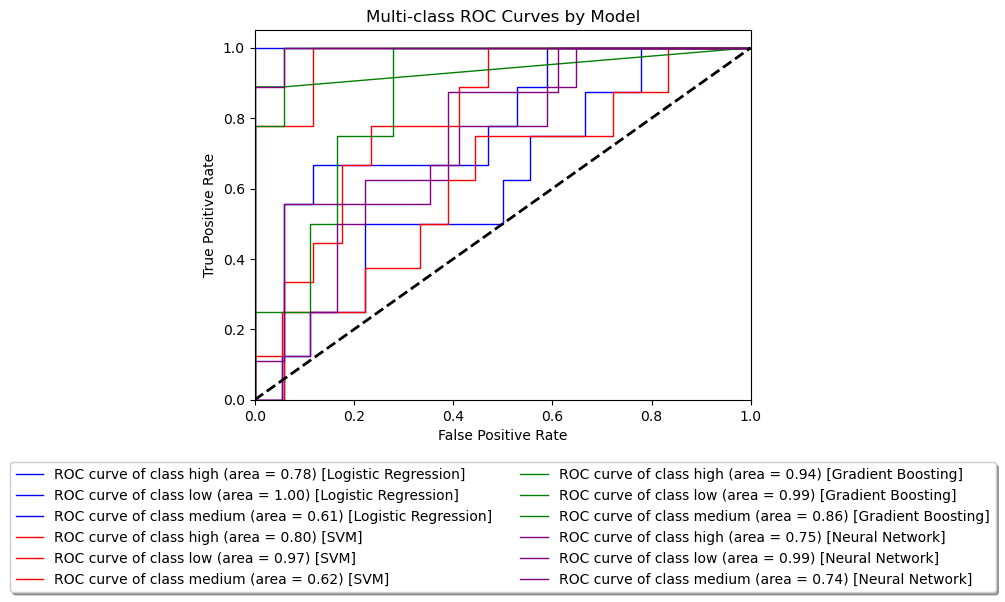

In [110]:
#Load data
data = pd.read_csv('movieDataClean.csv')

#Convert one-hot encoded target into a single column
data['Risk_Level'] = data[['Risk_Level_high', 'Risk_Level_medium', 'Risk_Level_low']].idxmax(axis=1)
data['Risk_Level'] = data['Risk_Level'].str.replace('Risk_Level_', '')

#Drop the original one-hot encoded columns
data.drop(columns=['Risk_Level_high', 'Risk_Level_medium', 'Risk_Level_low'], inplace=True)

#Split data into features and target
X = data.drop('Risk_Level', axis=1)
y = data['Risk_Level']

#Encode labels to integers for compatibility
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#Stratified split to ensure all classes are represented
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

#Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(gamma='scale', C=1, probability=True),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', random_state=50, max_iter=500)
}

#Train all models and store ROC AUC info
fpr = dict()
tpr = dict()
roc_auc = dict()

for name, classifier in classifiers.items():
    model = OneVsRestClassifier(classifier)
    model.fit(X_train, label_binarize(y_train, classes=[0, 1, 2]))
    y_score = model.predict_proba(X_test)
    for i in range(3):
        fpr[name, i], tpr[name, i], _ = roc_curve(label_binarize(y_test, classes=[0, 1, 2])[:, i], y_score[:, i])
        roc_auc[name, i] = auc(fpr[name, i], tpr[name, i])

#Plot ROC curves
colors = ['blue', 'red', 'green', 'purple']
for name, color in zip(classifiers.keys(), colors):
    for i in range(3):
        plt.plot(fpr[name, i], tpr[name, i], color=color, lw=1,
                 label='ROC curve of class {0} (area = {1:0.2f}) [{2}]'.format(label_encoder.inverse_transform([i])[0], roc_auc[name, i], name))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves by Model')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)
plt.show()


## ROC Graph for Models as a Whole

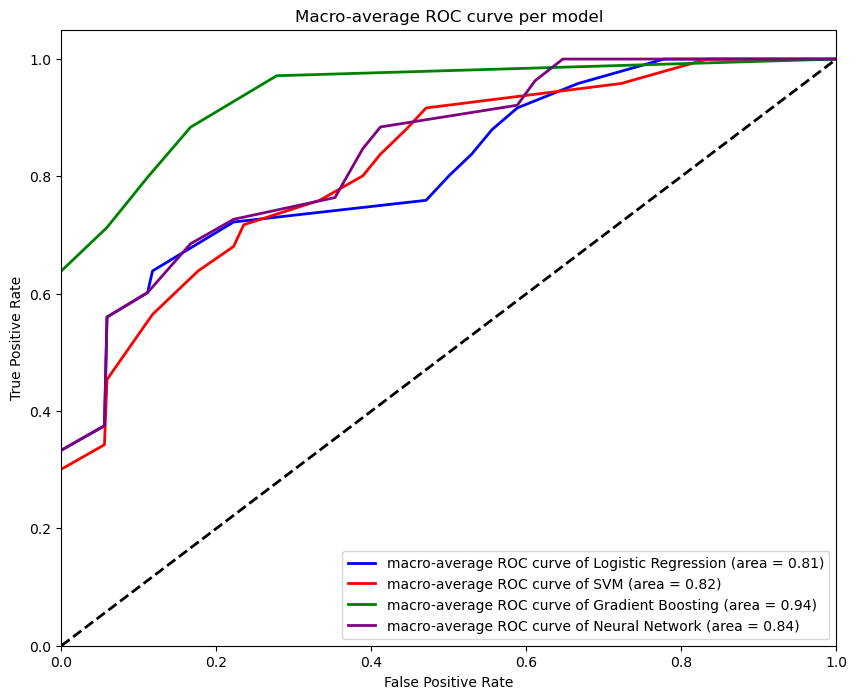

In [111]:
#Load data
data = pd.read_csv('movieDataClean.csv')

#Convert one-hot encoded target into a single column
data['Risk_Level'] = data[['Risk_Level_high', 'Risk_Level_medium', 'Risk_Level_low']].idxmax(axis=1)
data['Risk_Level'] = data['Risk_Level'].str.replace('Risk_Level_', '')

#Drop the original one-hot encoded columns
data.drop(columns=['Risk_Level_high', 'Risk_Level_medium', 'Risk_Level_low'], inplace=True)

#Split data into features and target
X = data.drop('Risk_Level', axis=1)
y = data['Risk_Level']

#Encode labels to integers for compatibility
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_bin = label_binarize(y_encoded, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

#Stratified split to ensure all classes are represented
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, stratify=y_encoded, random_state=42)

#Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(gamma='scale', C=1, probability=True),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', random_state=50, max_iter=500)
}

#Plot linewidth
lw = 2

# Colors cycle
colors = cycle(['blue', 'red', 'green', 'purple'])

#Plot ROC curves
plt.figure(figsize=(10, 8))
for (name, classifier), color in zip(classifiers.items(), colors):
    #Create a classifier with OneVsRest strategy
    classifier = OneVsRestClassifier(classifier)
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)

    #Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    #Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    #Plot all ROC curves
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve of {0} (area = {1:0.2f})'
                   ''.format(name, roc_auc["macro"]),
             color=color, linestyle='-', linewidth=lw)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC curve per model')
plt.legend(loc="lower right")
plt.show()

## Feature Importance Graph-LR and GB Comparison

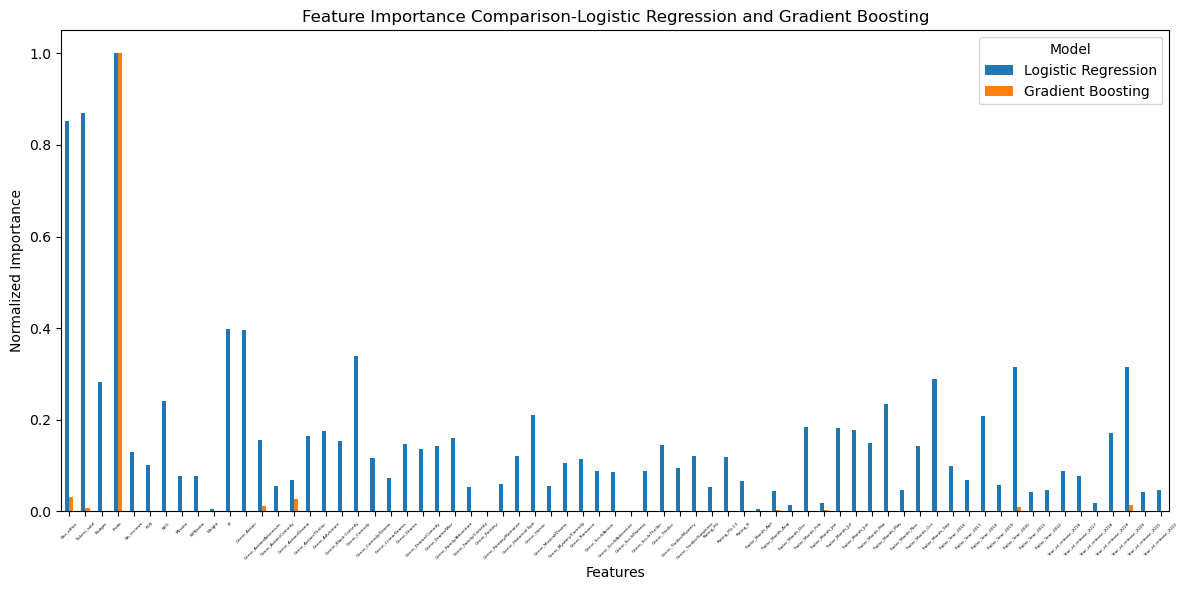

In [120]:
#Load data
data = pd.read_csv('movieDataClean.csv')

#Convert one-hot encoded target into a single column
data['Risk_Level'] = data[['Risk_Level_high', 'Risk_Level_medium', 'Risk_Level_low']].idxmax(axis=1)
data['Risk_Level'] = data['Risk_Level'].str.replace('Risk_Level_', '')

#Drop the original one-hot encoded columns
data.drop(columns=['Risk_Level_high', 'Risk_Level_medium', 'Risk_Level_low'], inplace=True)

#Split data into features and target
X = data.drop('Risk_Level', axis=1)
y = data['Risk_Level']

#Encode labels to integers for compatibility
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

#Fit models and extract feature importance
feature_importance = pd.DataFrame(index=X.columns)
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, 'coef_'):
        # For Logistic Regression
        feature_importance[name] = np.abs(model.coef_[0])
    elif hasattr(model, 'feature_importances_'):
        # For Gradient Boosting
        feature_importance[name] = model.feature_importances_

#Normalize feature importance
feature_importance = feature_importance / feature_importance.max()

#Plot
feature_importance.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance Comparison-Logistic Regression and Gradient Boosting')
plt.ylabel('Normalized Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, fontsize = 3)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


## Feature Importance Graph-All Models

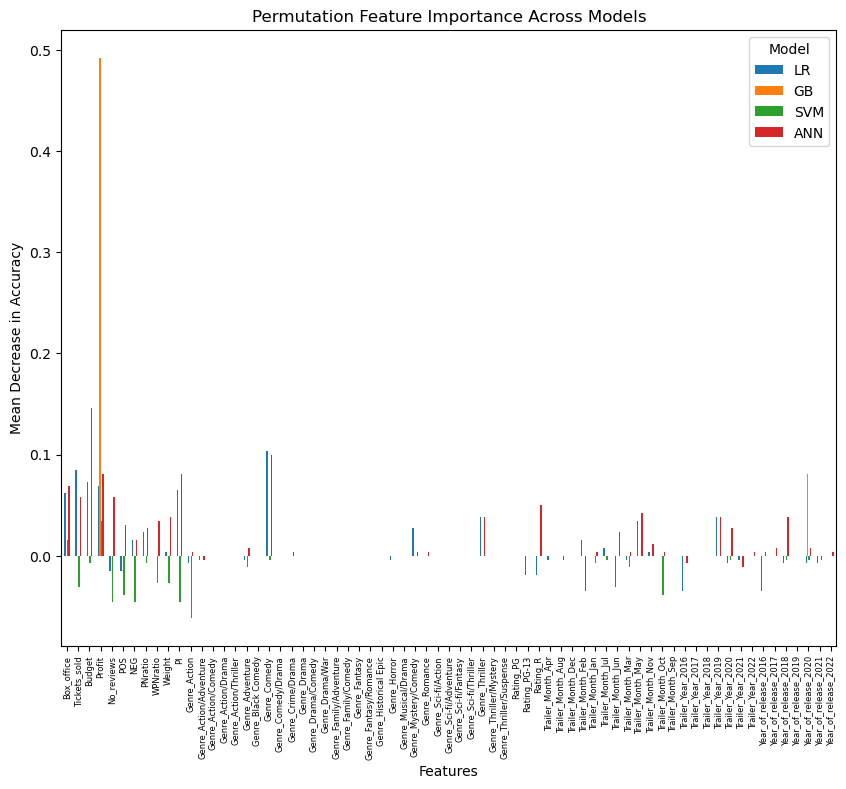

In [113]:
#Load data
data = pd.read_csv('movieDataClean.csv')

#Convert one-hot encoded target into a single column
data['Risk_Level'] = data[['Risk_Level_high', 'Risk_Level_medium', 'Risk_Level_low']].idxmax(axis=1)
data['Risk_Level'] = data['Risk_Level'].str.replace('Risk_Level_', '')

#Drop the original one-hot encoded columns
data.drop(columns=['Risk_Level_high', 'Risk_Level_medium', 'Risk_Level_low'], inplace=True)

#Split data into features and target
X = data.drop('Risk_Level', axis=1)
y = data['Risk_Level']

#Encode labels to integers for compatibility
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#Define models
models = {
    "LR": LogisticRegression(max_iter=1000),
    "GB": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "SVM": SVC(gamma='scale', C=1, probability=True),
    "ANN": MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', random_state=50, max_iter=500)
}

#Calculate permutation importance without parallel processing
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    #Set n_jobs=1 to avoid parallel processing issues
    results[name] = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)

#Prepare the plotting data
importances = pd.DataFrame({name: result.importances_mean for name, result in results.items()}, index=X.columns)

#Plotting
fig, ax = plt.subplots(figsize=(10, 8))
importances.plot(kind='bar', ax=ax)
ax.set_title('Permutation Feature Importance Across Models')
ax.set_ylabel('Mean Decrease in Accuracy')
ax.set_xlabel('Features')
ax.tick_params(axis='x', labelsize=6)
plt.legend(title='Model')
plt.show()


## Learning Curve Graph of all Models

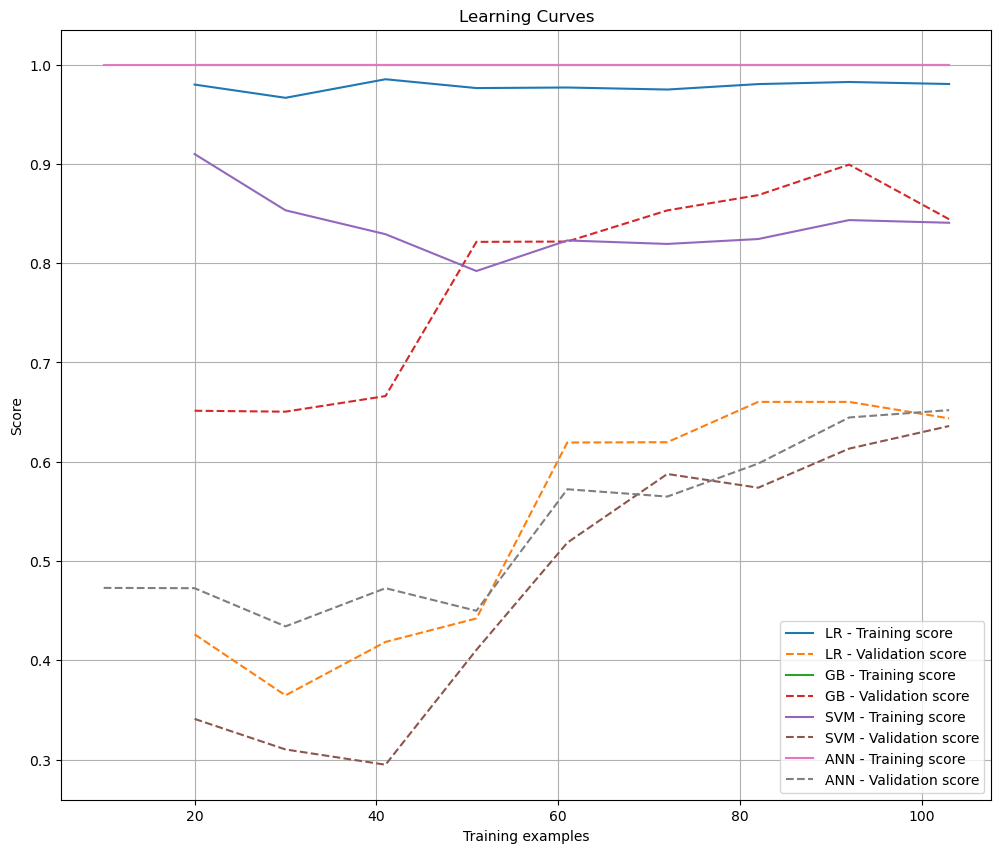

In [114]:
def plot_learning_curves(models, X, y):
    plt.figure(figsize=(12, 10))  

    #Loop through each model in the dictionary
    for name, model in models.items():
        #Compute the learning curve
        train_sizes, train_scores, validation_scores = learning_curve(
            model, X, y, train_sizes=np.linspace(0.1, 1.0, 10),
            cv=5, scoring='accuracy')

        #Calculate means of training and validation scores
        train_scores_mean = np.mean(train_scores, axis=1)
        validation_scores_mean = np.mean(validation_scores, axis=1)

        #Plot the learning curves
        plt.plot(train_sizes, train_scores_mean, label=f'{name} - Training score')
        plt.plot(train_sizes, validation_scores_mean, linestyle='--', label=f'{name} - Validation score')

    #Set labels and title for the plot
    plt.ylabel('Score')
    plt.xlabel('Training examples')
    plt.title('Learning Curves')
    plt.legend(loc='best')  
    plt.grid(True) 

    plt.show()

plot_learning_curves(models, X, y)


## Boxplot of Accuracy Scores Across Models

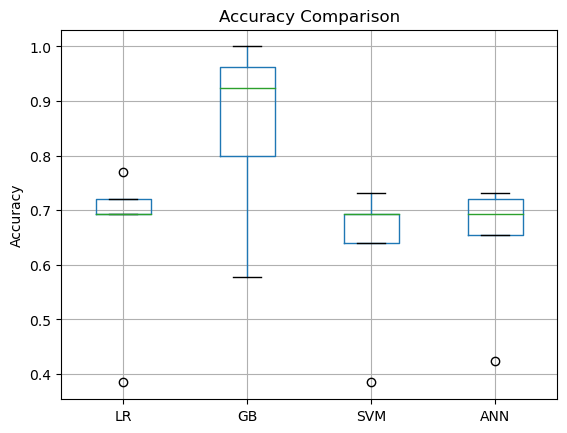

In [118]:
#Set up Boxplot Code
fig, ax = plt.subplots()
scores_dict = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  
    scores_dict[name] = scores

#Plot Boxplot
score_df = pd.DataFrame(scores_dict)
score_df.boxplot()
plt.ylabel('Accuracy')  
plt.title('Accuracy Comparison')
plt.show()


## Precision and F1 Score Boxplots

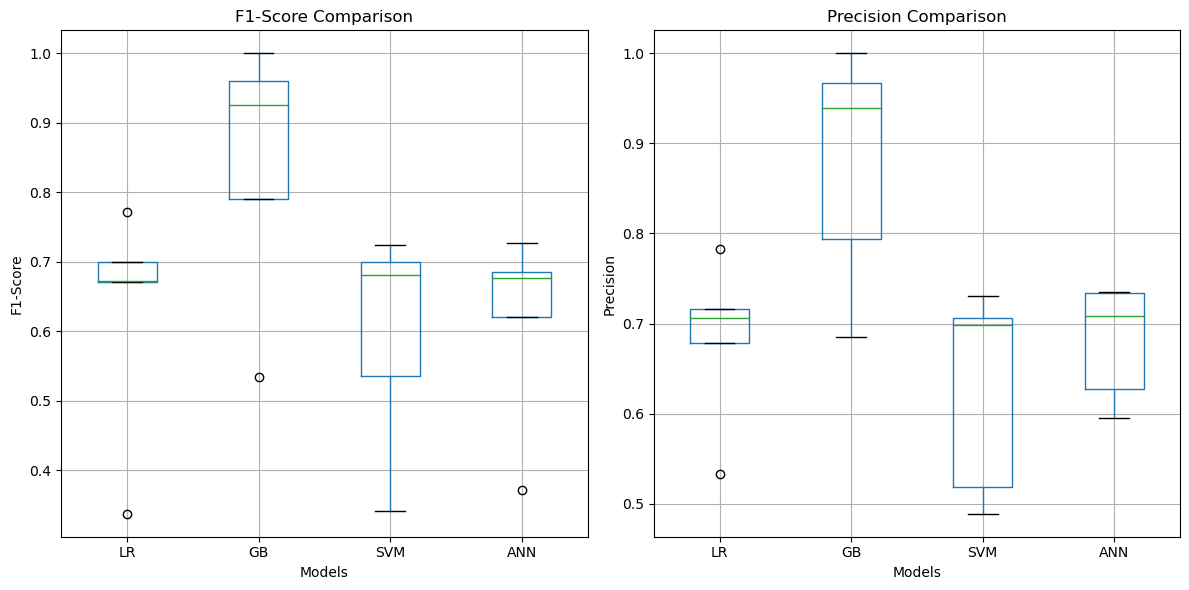

In [116]:
#Prepare figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#F1-Score Boxplot
f1_scores_dict = {}
for name, model in models.items():
    f1_scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(f1_score, average='macro'))  # Change 'macro' to 'binary' for binary classification
    f1_scores_dict[name] = f1_scores

f1_score_df = pd.DataFrame(f1_scores_dict)
f1_score_df.boxplot(ax=axes[0])
axes[0].set_title('F1-Score Comparison')
axes[0].set_ylabel('F1-Score')
axes[0].set_xlabel('Models')

#Precision Boxplot
precision_scores_dict = {}
for name, model in models.items():
    precision_scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(precision_score, average='macro'))  # Change 'macro' to 'binary' for binary classification
    precision_scores_dict[name] = precision_scores

precision_score_df = pd.DataFrame(precision_scores_dict)
precision_score_df.boxplot(ax=axes[1])
axes[1].set_title('Precision Comparison')
axes[1].set_ylabel('Precision')
axes[1].set_xlabel('Models')

plt.tight_layout()
plt.show()


## Metric Comparison Table

In [117]:
#Prepare the label encoder and encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Encode all labels uniformly

#Update train-test split and models to use encoded labels
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Set up label encoding
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'AUC': auc
    }

#Results
results_df = pd.DataFrame(results).T
print(results_df)


     Accuracy  F1 Score  Precision       AUC
LR   0.730769  0.733786   0.740385  0.897610
GB   0.846154  0.851936   0.902098  0.975642
SVM  0.615385  0.575214   0.608974  0.858932
ANN  0.769231  0.773726   0.806410  0.890205


## Permutation Feature Importance Graph-Only Values != 0.0

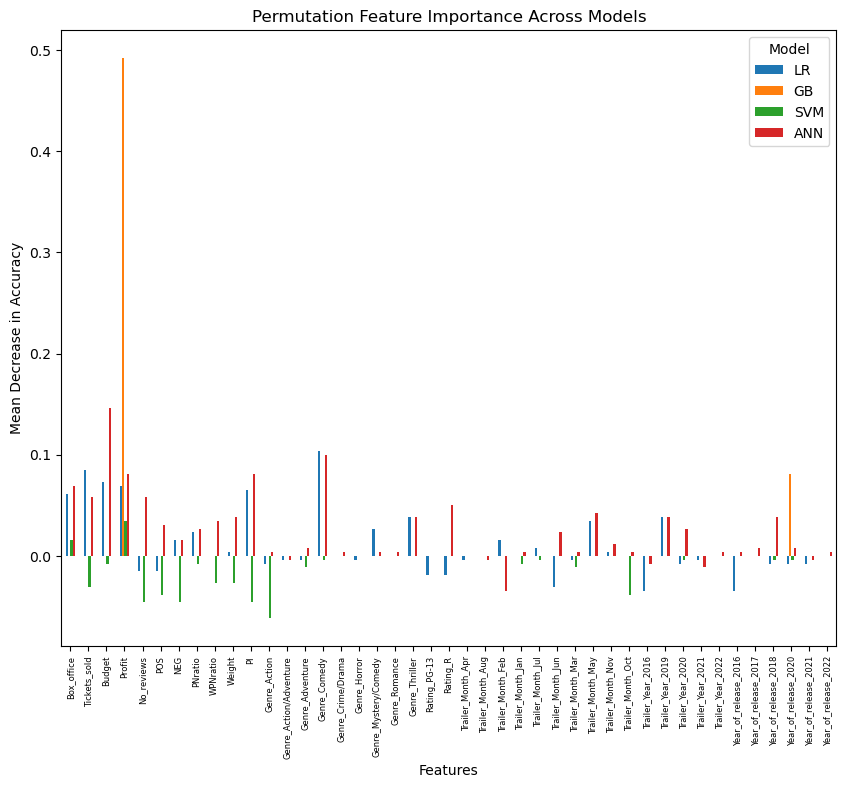

In [121]:
#Load data
data = pd.read_csv('movieDataClean.csv')

#Convert one-hot encoded target into a single column
data['Risk_Level'] = data[['Risk_Level_high', 'Risk_Level_medium', 'Risk_Level_low']].idxmax(axis=1)
data['Risk_Level'] = data['Risk_Level'].str.replace('Risk_Level_', '')

#Drop the original one-hot encoded columns
data.drop(columns=['Risk_Level_high', 'Risk_Level_medium', 'Risk_Level_low'], inplace=True)

#Split data into features and target
X = data.drop('Risk_Level', axis=1)
y = data['Risk_Level']

#Encode labels to integers for compatibility
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#Define models
models = {
    "LR": LogisticRegression(max_iter=1000),
    "GB": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "SVM": SVC(gamma='scale', C=1, probability=True),
    "ANN": MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', random_state=50, max_iter=500)
}

#Calculate permutation importance without parallel processing
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    # Set n_jobs=1 to avoid parallel processing issues
    results[name] = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)

#Prepare the plotting data
importances = pd.DataFrame({name: result.importances_mean for name, result in results.items()}, index=X.columns)

#Filter out features where all importance values are zero
importances = importances.loc[(importances != 0).any(axis=1)]

#Plotting
fig, ax = plt.subplots(figsize=(10, 8))
importances.plot(kind='bar', ax=ax)
ax.set_title('Permutation Feature Importance Across Models')
ax.set_ylabel('Mean Decrease in Accuracy')
ax.set_xlabel('Features')
ax.tick_params(axis='x', labelsize=6)
plt.legend(title='Model')
plt.show()
